## Bank Marketing Data Analysis

For this analysis I will use data from UCI Machine Learning Repository at 

https://archive.ics.uci.edu/ml/datasets/bank+marketing

Consider the data saved at the working drectory.

In [2]:
# Loading needed packages:

import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="white")
import matplotlib.pyplot as plt
%matplotlib inline  
from IPython.display import Image
from IPython.core.display import HTML


In [3]:
# Load data as pandas data frame
bank_data = pd.read_csv("bank-full.csv", sep = ";")
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
bank_data.shape

(45211, 17)

### Variable information

Tha dataset has these columns:

#### bank client data:
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. balance: average yearly balance, in euros (numeric) 
7. housing: has housing loan? (categorical: 'no','yes','unknown')
8. loan: has personal loan? (categorical: 'no','yes','unknown')

#### related with the last contact of the current campaign:
8. contact: contact communication type (categorical: 'cellular','telephone') 
9. day: last contact day of the month (numeric)
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### other attributes:
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

#### Output variable (desired target):
21.  y - has the client subscribed a term deposit? (binary: 'yes','no')

### Exploratory Analysis

For the sake of model building let us explore the dataset.

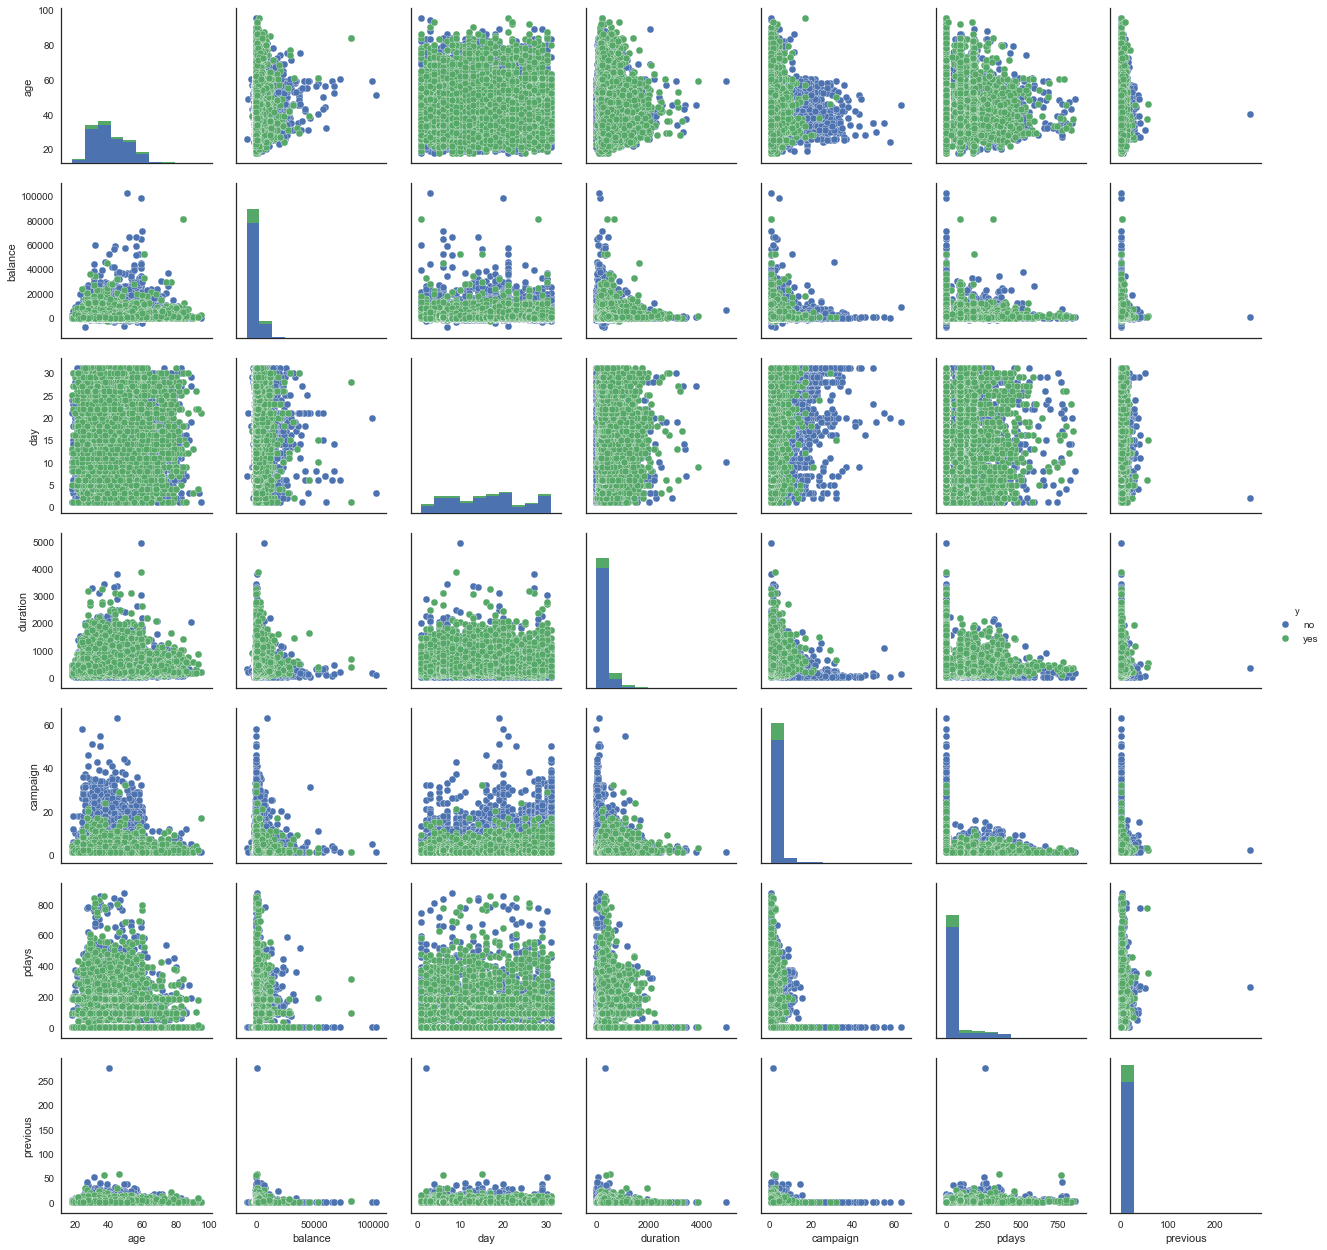

In [15]:
# Checking numerical data:
sns.pairplot(bank_data, hue = 'y')

We see that most of numerical variables are not strongly correlated and that the is a larger proportion of non term deposit subscribers.

/home/bessa/anaconda2/lib/python2.7/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


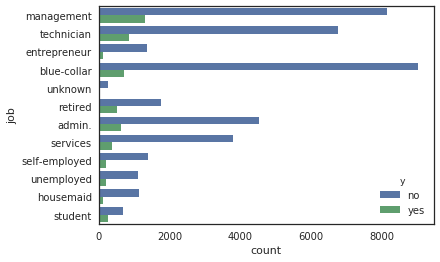

In [4]:
# Como a variável resposta se comporta com relação a 'job':
sns.countplot(y = 'job', 
              hue = 'y', 
              data = bank_data)

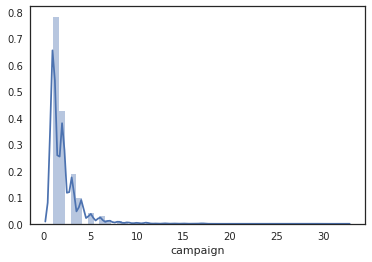

In [6]:
sns.distplot(bank_data[bank_data['y'] == 'yes']['campaign'])

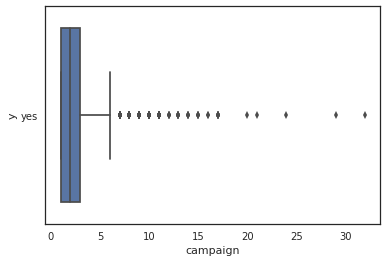

In [9]:
sns.boxplot(x = 'campaign', 
            y = 'y', 
            data = bank_data[bank_data['y'] == 'yes'])

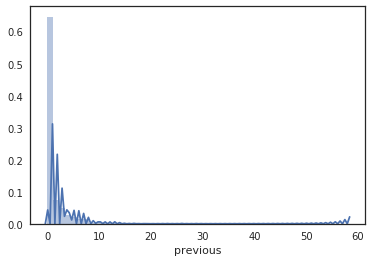

In [7]:
sns.distplot(bank_data[bank_data['y'] == 'yes']['previous'])

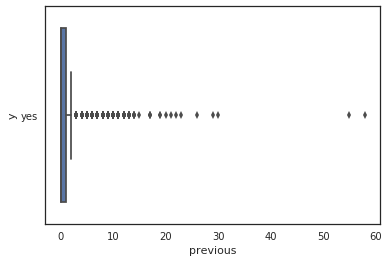

In [12]:
sns.boxplot(x = 'previous', 
            y = 'y', 
            data = bank_data[bank_data['y'] == 'yes'])

In [16]:
bank_data[bank_data['y'] == 'yes']['campaign'].mean()

2.1410474569861977

In [25]:
bank_data.groupby(['poutcome', 'y'])['y'].count()

poutcome  y  
failure   no      4283
          yes      618
other     no      1533
          yes      307
success   no       533
          yes      978
unknown   no     33573
          yes     3386
Name: y, dtype: int64

### Questions (portuguese)

1. Qual profissão tem mais tendência a fazer um empréstimo? De qual tipo?
    Observando o primeiro gráfico, vemos que a profissão com maior aderência à campanha é "management".
2. Fazendo uma relação entre número de contatos e sucesso da campanha quais são os pontos relevantes a serem observados?
    Para a enorme maioria dos casos (mais de 75% da distribuição de respondentes), um número baixo de contatos foi o suficiente para a adesão do cliente (até 6 contatos). Esta variável sozinha não é capaz de explicar o fenômeno.  
3. Baseando-se nos resultados de adesão desta campanha qual o número médio e o máximo de ligações que você indica para otimizar a adesão?
    Um número médio de dois contatos.    
4. O resultado da campanha anterior tem relevância na campanha atual?
    Em geral sim: 87% dos que não aderiram à última campanha (4283 de um total de 4901) também não aderiram à atual. E 64% dos que aderiram à campanha (978 de um total de 1511) anterior aderiram à atual. 
5. Qual o fator determinante para que o banco exija um seguro de crédito?
    De acordo com a regra de negócio, se houver registro positivo na variável "default".
6. Quais são as características mais proeminentes de um cliente que possua empréstimo imobiliário?
    Número de contatos na campanha junto à profissão e idade.